In [32]:
import json

with open("overview.json", "r") as f:
    data = json.load(f)

In [39]:
def get_data_per_year(i, data):
    result = {str(y):0 for y in range(15, 23)}
    for year in [str(y) for y in range(15, 23)]:
        for date, values in data.items():
            if year in date:
                result[year] += values[i]
        
    return result 

per_topic = {}
for i, topic in enumerate(['Kampfhandlungen', 'Humanitäre Krise', 'Verhandlungen','Militärische Unterstützung', 'Wirtschaft']):
    per_topic[topic] = get_data_per_year(i, data)



In [40]:
topic = "Kampfhandlungen"
vis_data = []
for k, v in per_topic[topic].items():
    vis_data += ["20"+k for _ in range(v)]

In [60]:
per_topic.keys()
colors = {"Kampfhandlungen":"#643A71", "Humanitäre Krise":"#96D6A3", "Verhandlungen":"#62929E","Militärische Unterstützung":"#BDC667", "Wirtschaft":"#222A68"}


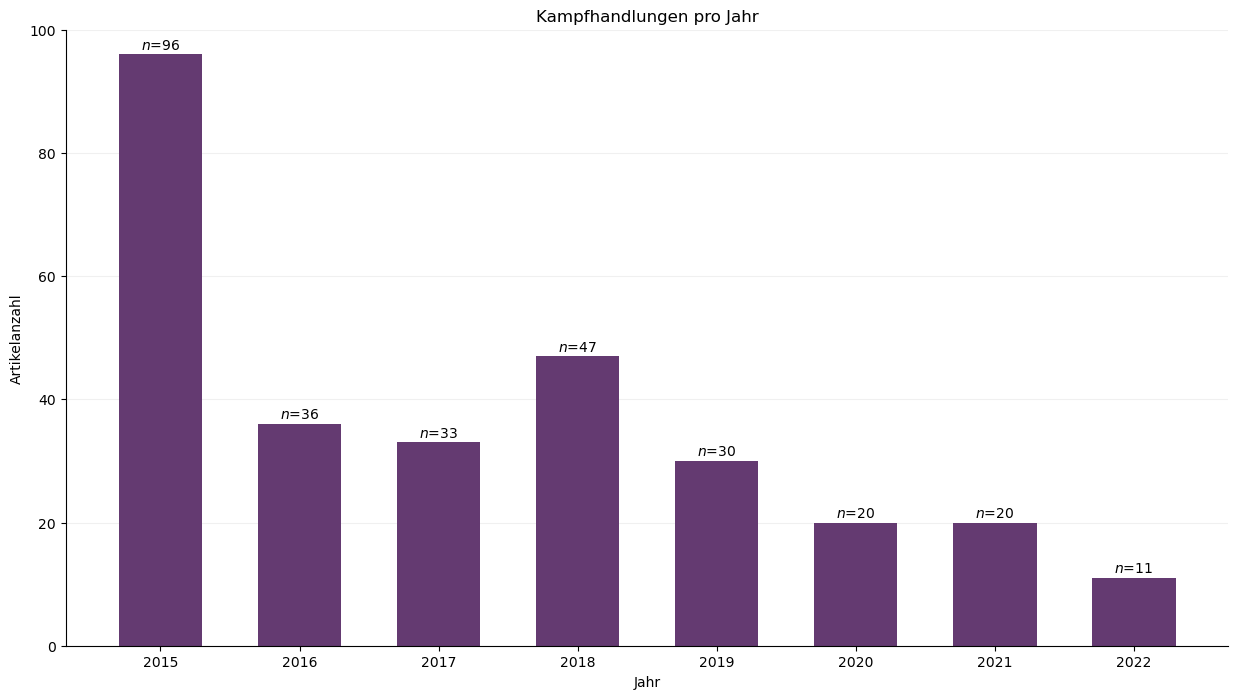

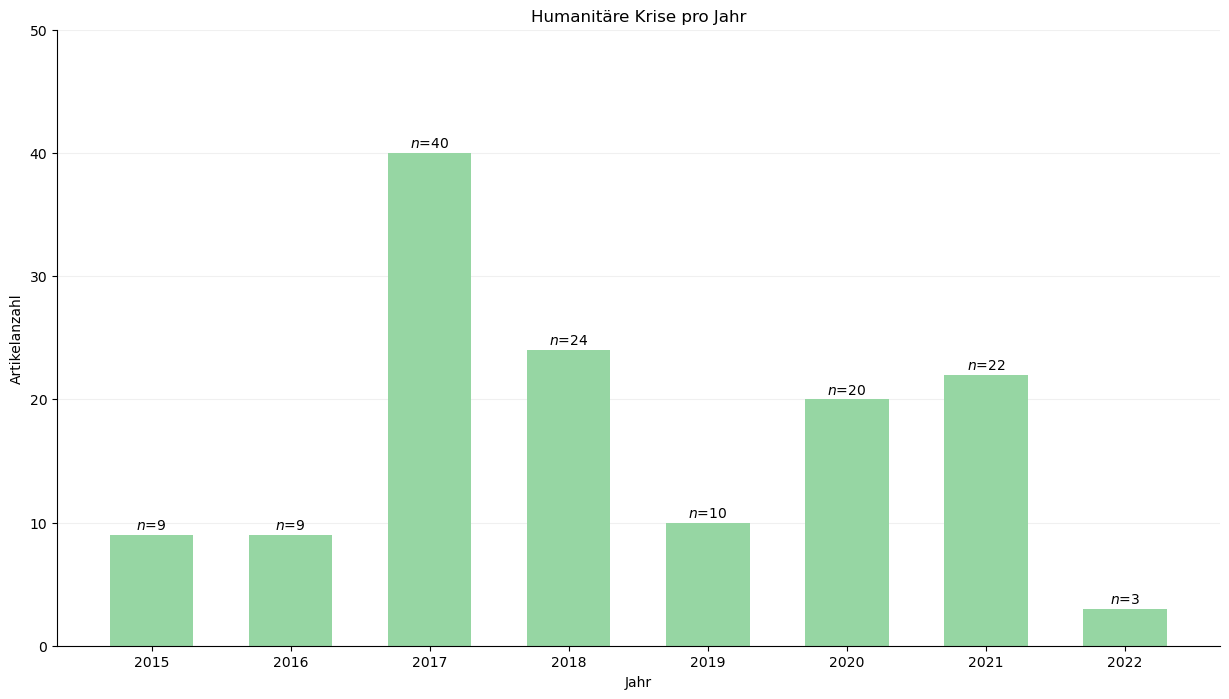

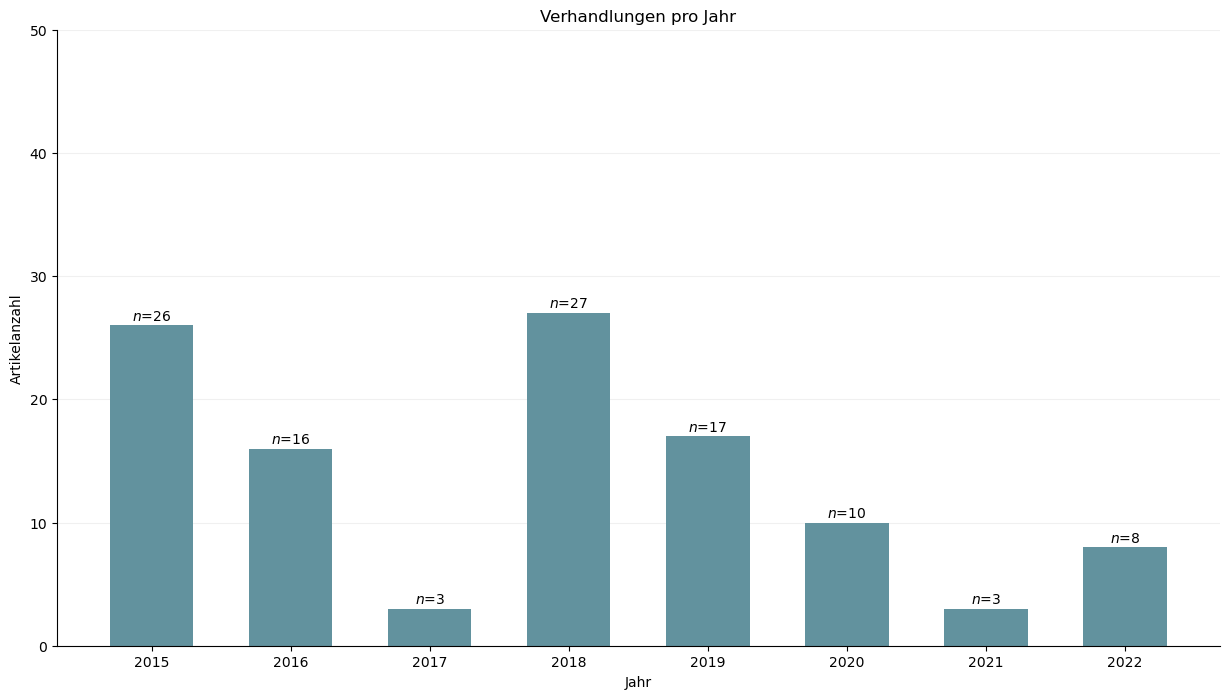

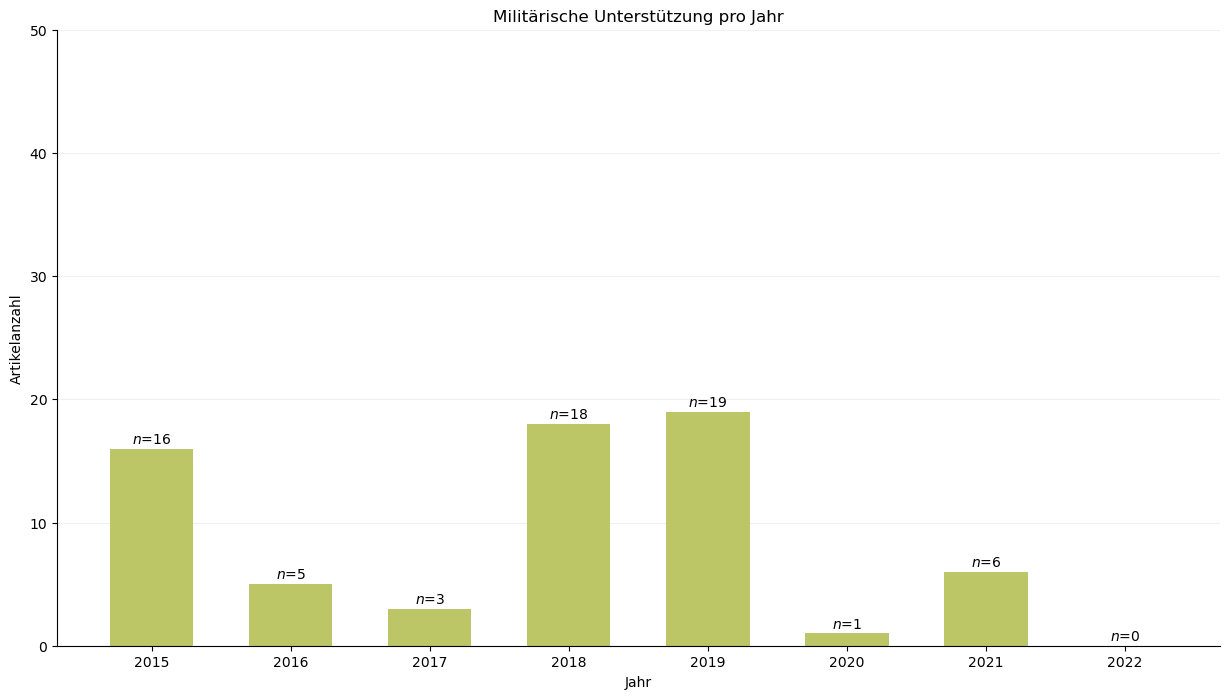

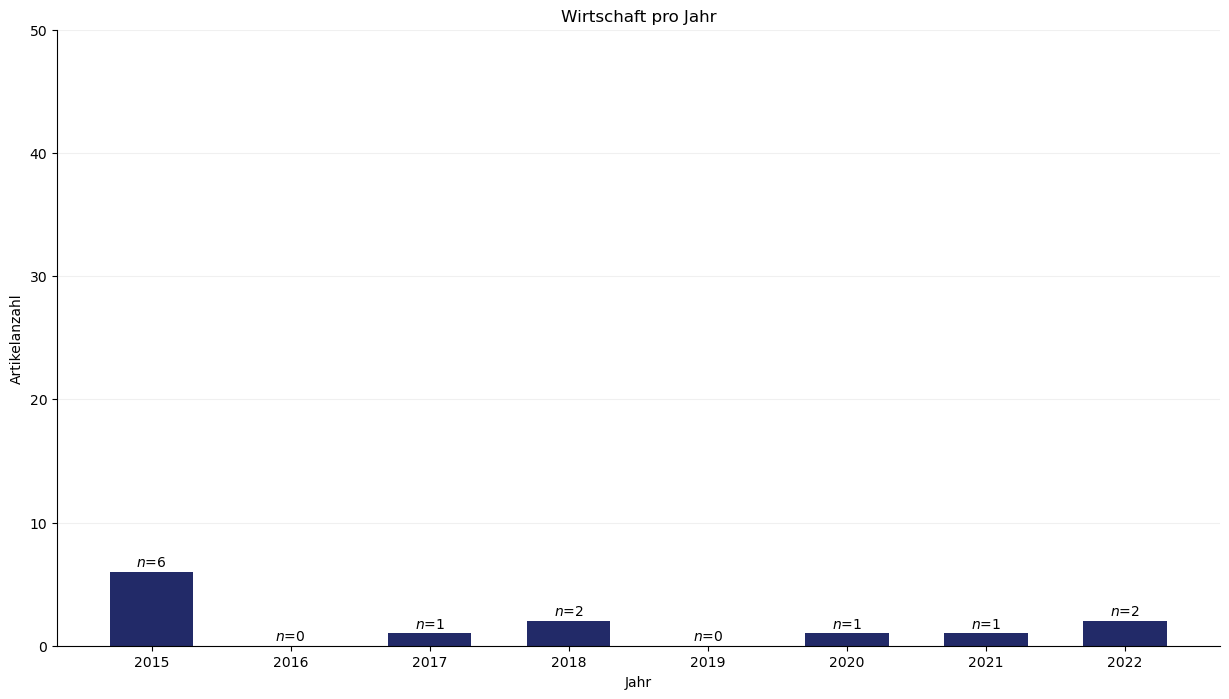

In [75]:
import matplotlib.pyplot as plt
for topic in per_topic:
    vis_data = per_topic[topic]
    years = ["20"+ y for y in list(vis_data.keys())]
    freq = list(vis_data.values())

    fig, ax = plt.subplots()
    width = 0.6

    plt.bar(years, freq, width=width, color=colors[topic])
    plt.title(f"{topic} pro Jahr")
    plt.xlabel("Jahre")
    plt.ylabel("Artikelanzahl")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    fig.set_figheight(8)

    fig.set_figwidth(15)
    plt.xlabel("Jahr")
    plt.ylabel("Artikelanzahl")

    ax.set_axisbelow(True)

    if topic == "Kampfhandlungen":
        plt.ylim(0,100)
    else:
        plt.ylim(0,50)
    plt.grid(axis="y", which="major", linestyle="-", color='#f0f0f0')

    for i, year in enumerate(vis_data.keys()):
        if topic == "Kampfhandlungen":
            plt.text(i , vis_data[year] +1.5  , "$n$=" + str(vis_data[year]) , 
                                va = 'center', ha = 'center', rotation = 0, fontsize = 10
                                )
        else:
            plt.text(i , vis_data[year] +0.75  , "$n$=" + str(vis_data[year]) , 
                                va = 'center', ha = 'center', rotation = 0, fontsize = 10
                                )


    plt.savefig(f'{topic}-pro-jahr.png', dpi=300, bbox_inches='tight')


